In [64]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16
from keras.layers import Dense, Flatten, Input

In [65]:
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2

In [164]:
data = np.load('y_train.npy')
print(data)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


[   3    4   63   64   79  104  118 1830 4735]
[1 1 1 1 1 1 1 1 1]


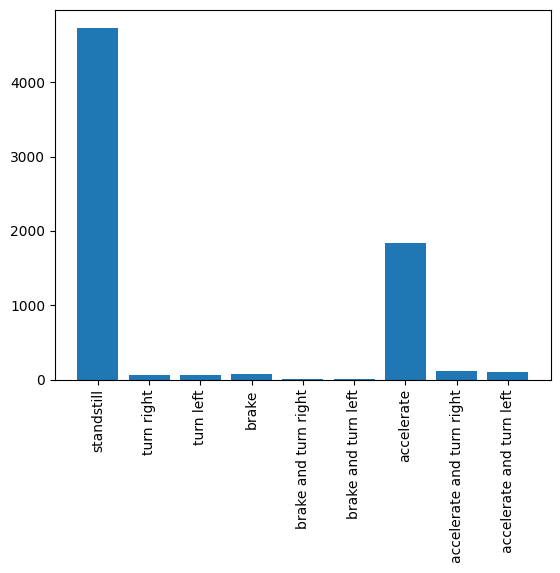

In [168]:
# use numpy to count the frequency of each subvector
unique, counts = np.unique(data, return_counts=True, axis=0)
print(unique)
print(counts)
# your data
data = [4735, 63, 64, 79, 4, 3, 1830, 118, 104]
labels = [[0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 1, 0, 1, 0],
 [0, 1, 1, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 0, 1, 0, 0]]

labels = ['standstill', 'turn right', 'turn left', 'brake', 'brake and turn right', 'brake and turn left', 'accelerate', 'accelerate and turn right', 'accelerate and turn left']

# plot
plt.bar(labels, data)
plt.xticks(rotation=90)
plt.show()

2773
[0 1 0 0 0]


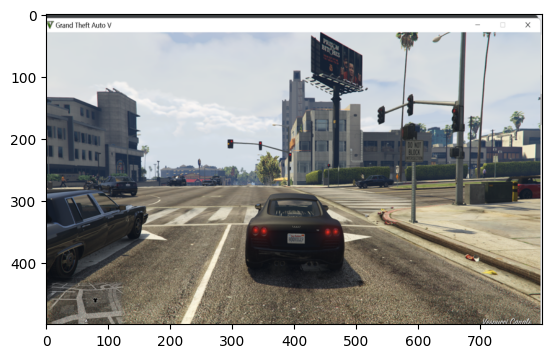

In [134]:
random_index = random.randint(0, data.shape[0]-1)
print(random_index)
print(data[random_index])
img_name = 'training_7000/train_{}.png'.format(random_index)
img = cv2.imread(img_name)
plt.imshow(img)

In [135]:
import os
import numpy as np

# Load the image data
X_train = []
y_train = np.load('y_train.npy')

for i, img_name in enumerate(os.listdir('training_7000/')):
    img = plt.imread('training_7000/' + img_name)
    X_train.append(img)
X_train = np.array(X_train)

X_test = []
y_test = np.load('y_val.npy')

for i, img_name in enumerate(os.listdir('validation_1500/')):
    img = plt.imread('validation_1500/' + img_name)
    X_test.append(img)
X_test = np.array(X_test)

In [136]:
# Preprocess the data
# Resize the images to a standard size
X_train = tf.image.resize(X_train, (224, 224))
X_test = tf.image.resize(X_test, (224, 224))

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [137]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [138]:
history = model.fit(X_train, y_train, batch_size=16, epochs=25, verbose=1, validation_data=(X_test, y_test))

Epoch 1/25
438/438 [==============================] - 160s 363ms/step - loss: 1.1744 - accuracy: 0.6474 - val_loss: 1.3297 - val_accuracy: 0.7853
Epoch 2/25
438/438 [==============================] - 162s 369ms/step - loss: 23.1020 - accuracy: 0.5264 - val_loss: 29.1573 - val_accuracy: 0.7853
Epoch 3/25
438/438 [==============================] - 161s 368ms/step - loss: 120.2098 - accuracy: 0.5119 - val_loss: 50.0844 - val_accuracy: 0.7853
Epoch 4/25
438/438 [==============================] - 160s 366ms/step - loss: 241.4546 - accuracy: 0.5129 - val_loss: 168.9635 - val_accuracy: 0.7853
Epoch 5/25
438/438 [==============================] - 162s 370ms/step - loss: 337.1828 - accuracy: 0.5120 - val_loss: 162.7856 - val_accuracy: 0.7853
Epoch 6/25
438/438 [==============================] - 161s 368ms/step - loss: 541.9307 - accuracy: 0.5169 - val_loss: 384.3705 - val_accuracy: 0.7853
Epoch 7/25
438/438 [==============================] - 160s 365ms/step - loss: 728.9906 - accuracy: 0.5107 -

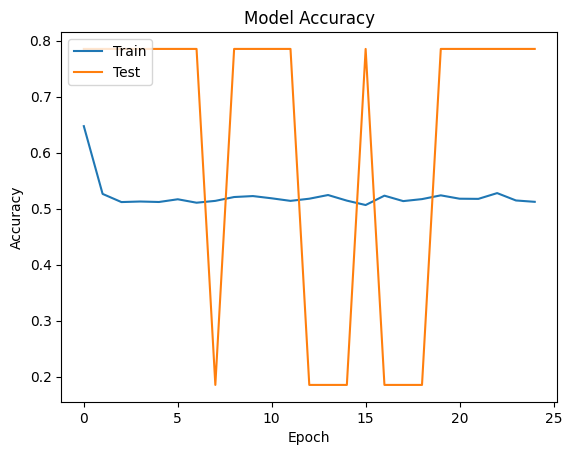

In [139]:
# Plot the training and validation accuracy/loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 47ms/step
[[0. 0. 0. 0. 1.]]


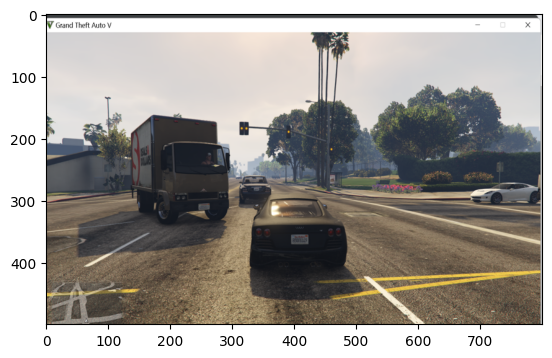

In [146]:
import random

# Select a random image from the test set
random_index = random.randint(0, len(X_test) - 1)
random_image = X_test[random_index]
random_label = y_test[random_index]

# Use the model to make a prediction
predictions = model.predict(np.array([random_image]))
# print(np.array([random_image]))
img = cv2.imread('validation_1500/val_{}.png'.format(random_index))
plt.imshow(img)
# Print the prediction
print(predictions)

In [147]:
# Save the whole model to a HDF5 file
model.save('model.h5')